In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
img = cv.imread("cropped_box_3.png")

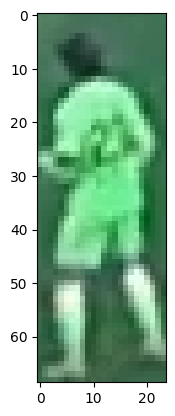

In [7]:
plt.imshow(img)

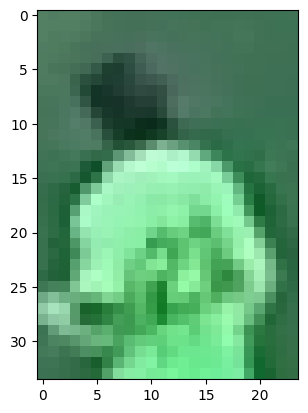

In [12]:
top_half_img = img[0:int(img.shape[0]/2),:]
plt.imshow(top_half_img)

In [15]:
img2d = top_half_img.reshape(-1,3)
img2d

array([[ 83, 127,  99],
       [ 80, 124,  97],
       [ 82, 126,  98],
       ...,
       [ 26, 100,  49],
       [ 45, 109,  63],
       [ 51, 109,  69]], dtype=uint8)

In [17]:
kmeans = KMeans(n_clusters=2, random_state=101)
kmeans.fit(img2d)

KMeans(n_clusters=2, random_state=101)

In [19]:
img_labels = kmeans.labels_

In [21]:
clustered_img = img_labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

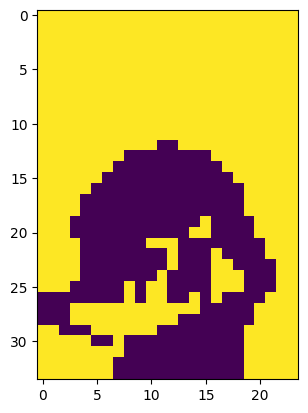

In [22]:
plt.imshow(clustered_img)
plt.show()

In [23]:
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]
corner_clusters

[1, 1, 1, 1]

In [29]:
bg_cluster = max(set(corner_clusters), key=corner_clusters.count)
player_cluster = 1-bg_cluster

In [31]:
shirt_color = kmeans.cluster_centers_[player_cluster]

In [32]:
shirt_color

array([132.20740741, 224.28148148, 157.5037037 ])